# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [28]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color 
from skimage.filters import rank
from skimage.util import img_as_ubyte

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

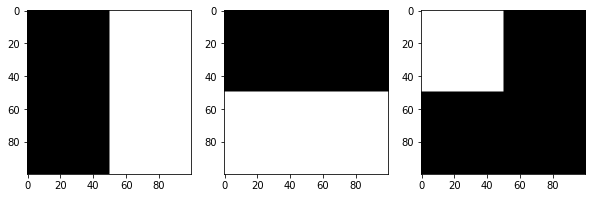

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


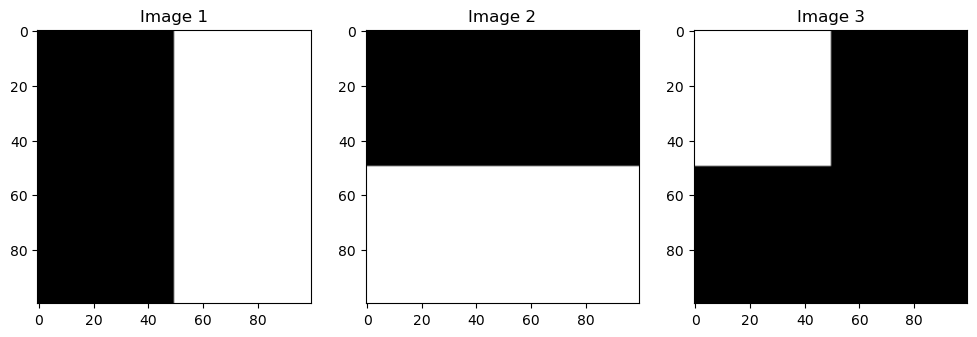

In [4]:
# solution
# Create 100x100 images
image1 = np.zeros((100, 100), dtype=np.uint8)
image1[:, 50:] = 255  # Right half is white

image2 = np.zeros((100, 100), dtype=np.uint8)
image2[50:, :] = 255  # Bottom half is white

image3 = np.zeros((100, 100), dtype=np.uint8)
image3[:50, :50] = 255  # Top-right quadrant is white

# Plot the images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image1, cmap='gray')
axes[0].set_title("Image 1")
axes[1].imshow(image2, cmap='gray')
axes[1].set_title("Image 2")
axes[2].imshow(image3, cmap='gray')
axes[2].set_title("Image 3")

plt.show()

*   Use the above three images to create the following image

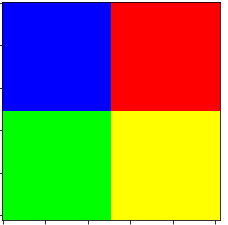
*Hint: Remember channels and color spaces*

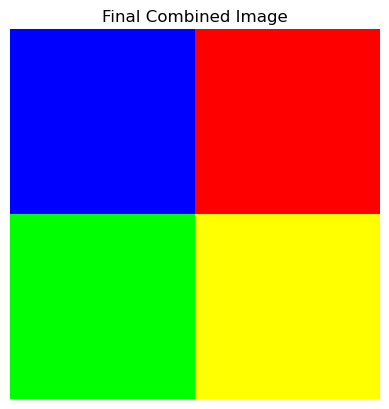

In [ ]:
# solution

final_image = np.zeros((100, 100, 3), dtype=np.uint8)

# Assign colors to different quadrants
final_image[:50, :50] = [0, 0, 255]   # Blue (Top-Left)
final_image[:50, 50:] = [255, 0, 0]   # Red (Top-Right)
final_image[50:, :50] = [0, 255, 0]   # Green (Bottom-Left)
final_image[50:, 50:] = [255, 255, 0] # Yellow (Bottom-Right)

# Plot the final image
plt.imshow(final_image)
plt.axis('off')  # Hide axes for better visualization
plt.title("Final Combined Image")
plt.show()



### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

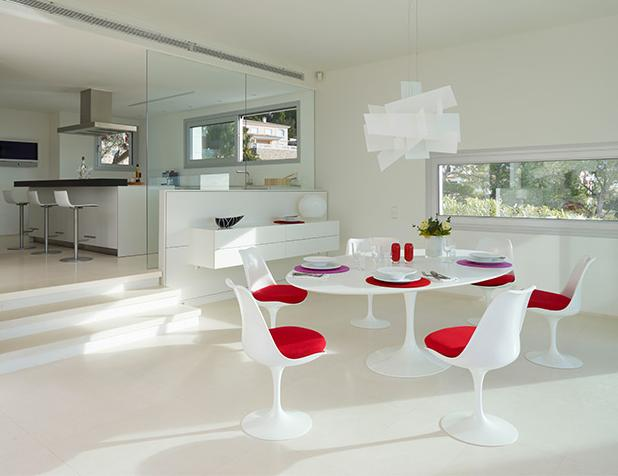

*   Extract individual channels and plot them using matplotlib subplot.



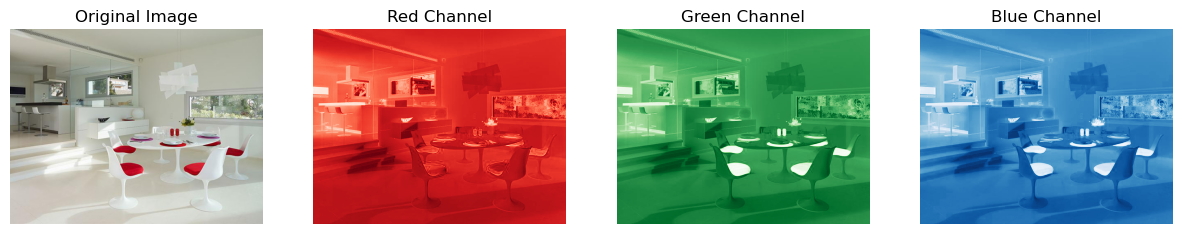

In [6]:
# solution
image_path = "images/sillas.jpg" 
image = io.imread(image_path)

red_channel = image[:, :, 0]   # Red Channel
green_channel = image[:, :, 1] # Green Channel
blue_channel = image[:, :, 2]  # Blue Channel


fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(red_channel, cmap="Reds")
axes[1].set_title("Red Channel")
axes[1].axis("off")

axes[2].imshow(green_channel, cmap="Greens")
axes[2].set_title("Green Channel")
axes[2].axis("off")

axes[3].imshow(blue_channel, cmap="Blues")
axes[3].set_title("Blue Channel")
axes[3].axis("off")

plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

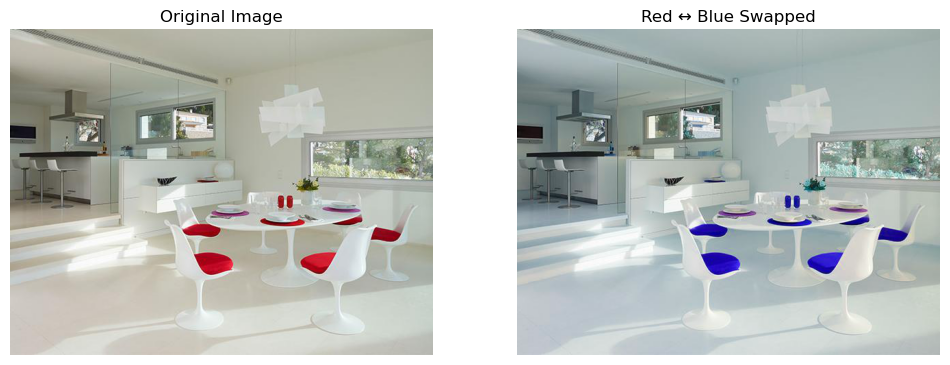

In [9]:
# solution

new_image = image.copy()
new_image[:, :, [0, 2]] = new_image[:, :, [2, 0]]  # Swap Red and Blue


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(new_image)
axes[1].set_title("Red ↔ Blue Swapped")
axes[1].axis("off")

plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

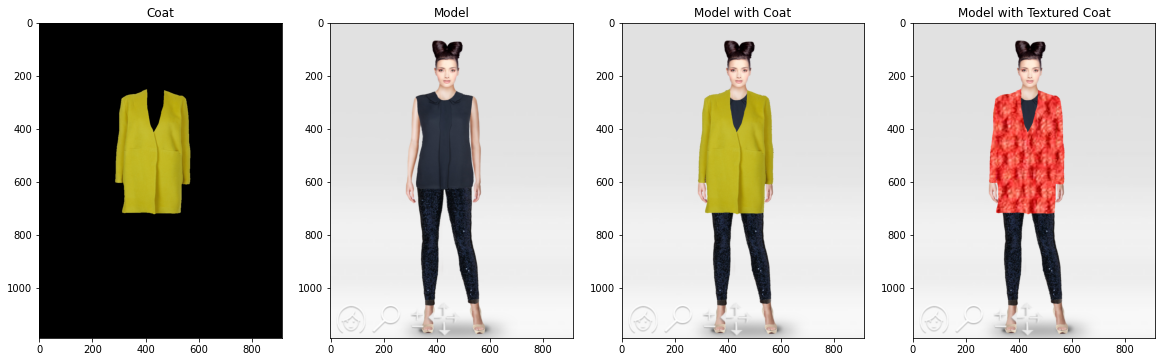

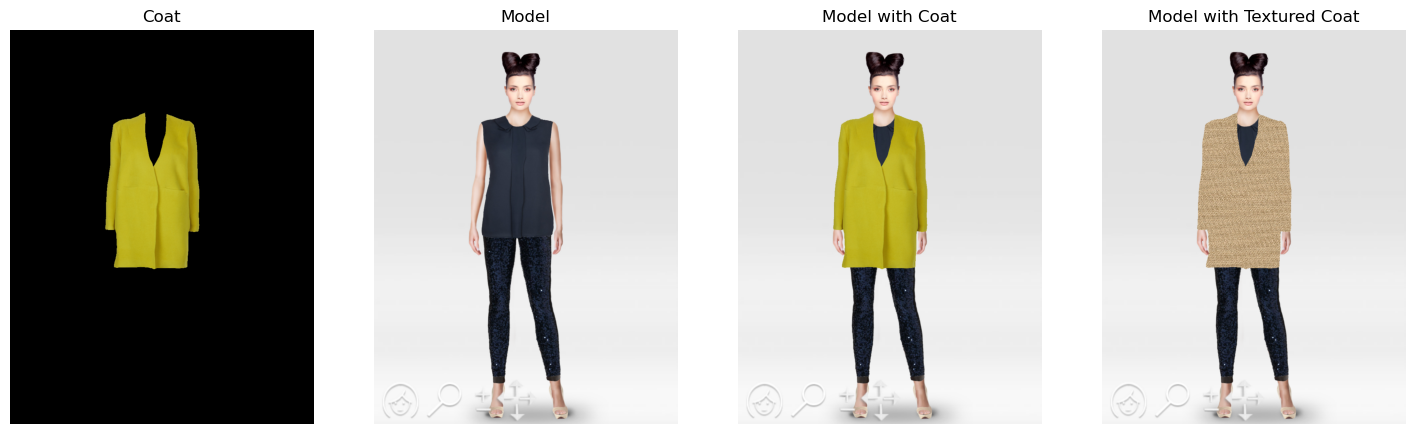

In [17]:
# solution

model = io.imread("images/model.png")
coat = io.imread("images/coat.png")
texture = io.imread("images/texture3.jpg")  

# Convert RGBA to RGB if necessary
if coat.shape[-1] == 4:
    coat = coat[:, :, :3]  # Remove the alpha channel
if model.shape[-1] == 4:
    model = model[:, :, :3]  # Remove the alpha channel    

# Convert coat to grayscale and create a binary mask
gray_coat = color.rgb2gray(coat)
mask = gray_coat > 0.2  #

# Step 1: Overlay the coat on the model
model_with_coat = model.copy()
model_with_coat[mask] = coat[mask]

# Step 2: Apply texture to the coat region
resized_texture = np.resize(texture, coat.shape)  
textured_coat = coat.copy()
textured_coat[mask] = resized_texture[mask]  

model_with_texture = model.copy()
model_with_texture[mask] = textured_coat[mask]


fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].imshow(coat)
axes[0].set_title("Coat")
axes[0].axis("off")

axes[1].imshow(model)
axes[1].set_title("Model")
axes[1].axis("off")

axes[2].imshow(model_with_coat)
axes[2].set_title("Model with Coat")
axes[2].axis("off")

axes[3].imshow(model_with_texture)
axes[3].set_title("Model with Textured Coat")
axes[3].axis("off")

plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




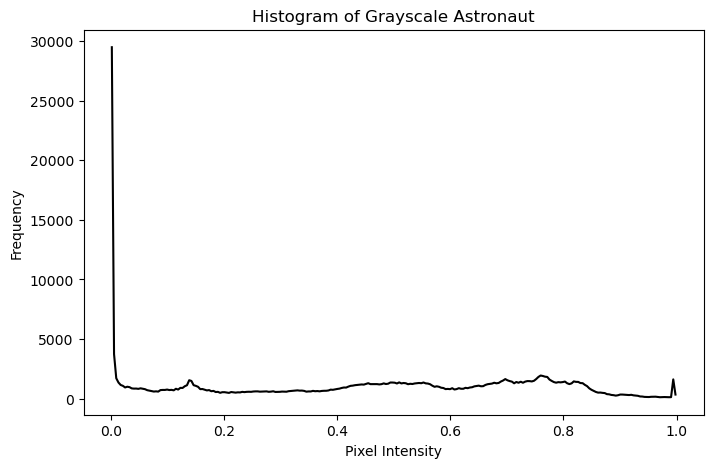

In [20]:
# solution

# Load the astronaut image
astronaut = data.astronaut()

# Convert to grayscale
gray_astronaut = color.rgb2gray(astronaut)

# Compute the histogram
hist, bins = exposure.histogram(gray_astronaut)

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.plot(bins, hist, color='black')
plt.title("Histogram of Grayscale Astronaut")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

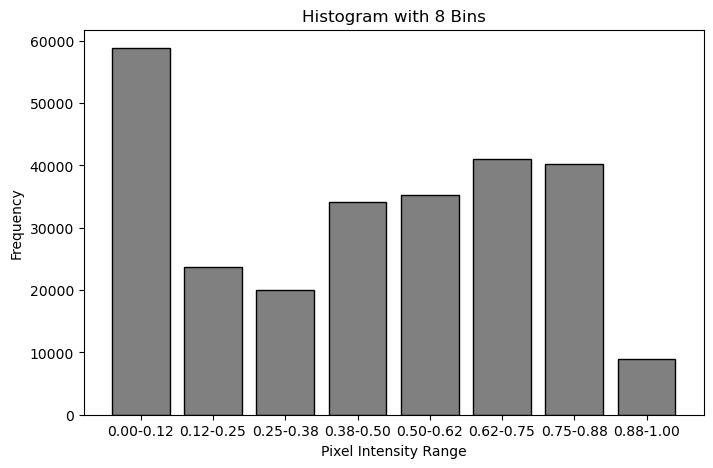

In [21]:
# solution
# Compute histogram with 8 bins
hist_8, bins_8 = np.histogram(gray_astronaut.flatten(), bins=8, range=[0,1])

# Plot histogram with 8 bins
plt.figure(figsize=(8, 5))
plt.bar(range(8), hist_8, color='gray', edgecolor='black')
plt.xticks(range(8), labels=[f"{bins_8[i]:.2f}-{bins_8[i+1]:.2f}" for i in range(8)])
plt.title("Histogram with 8 Bins")
plt.xlabel("Pixel Intensity Range")
plt.ylabel("Frequency")
plt.show()





*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.

***Solution:***
Changing the bin count affects histogram clarity fewer bins (e.g., 8) make it blocky and oversimplified, while more bins (e.g., 256) show fine details but may appear noisy. Yes, inference changes because a low bin count hides variations, while a high bin count can overcomplicate analysis. The correct bin count depends on the goal (256) bins for full grayscale detail, 32-64 bins for a balanced view. 


*   What happens when the bin count is very low and what happens when it is very high?

***Solution:***
When the bin count is very low (e.g., 8), intensity values are grouped into broad categories, making the histogram blocky and hiding details. When the bin count is very high (e.g., 256), the histogram captures fine details but may appear too noisy and hard to interpret. The right balance depends on the level of detail needed. 


...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


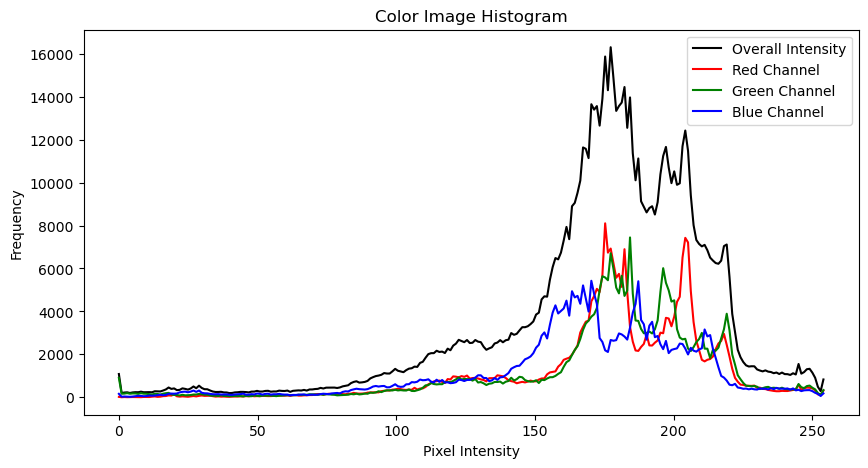

In [22]:
#solution


colors = ['red', 'green', 'blue']
channel_histograms = [np.histogram(image[:, :, i], bins=256, range=[0, 255])[0] for i in range(3)]
overall_hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 255])


plt.figure(figsize=(10, 5))
plt.plot(bins[:-1], overall_hist, color='black', label='Overall Intensity')
for i, color in enumerate(colors):
    plt.plot(bins[:-1], channel_histograms[i], color=color, label=f'{color.capitalize()} Channel')

plt.title("Color Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



c:\Users\rkhm3\anaconda3\Lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


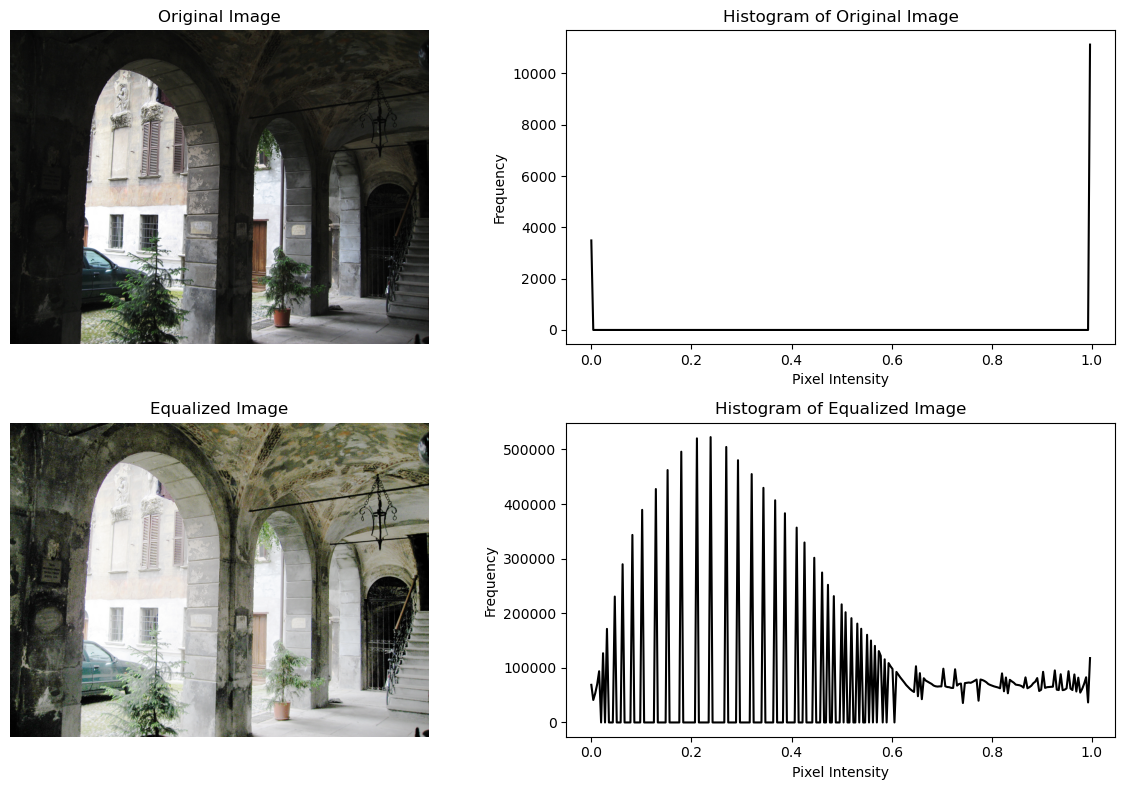

In [23]:
# solution

image_path = "images/aquatermi_lowcontrast.jpg"  
image = io.imread(image_path)


# Compute histogram of original image
hist_orig, bins_orig = np.histogram(image.flatten(), bins=256, range=[0, 1])

# Apply histogram equalization
equalized_image = exposure.equalize_hist(image)

# Compute histogram of equalized image
hist_eq, bins_eq = np.histogram(equalized_image.flatten(), bins=256, range=[0, 1])

# Plot using a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Histogram of original image
axes[0, 1].plot(bins_orig[:-1], hist_orig, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")

# Equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title("Equalized Image")
axes[1, 0].axis("off")

# Histogram of equalized image
axes[1, 1].plot(bins_eq[:-1], hist_eq, color='black')
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Histogram Equalization (HE) adjusts brightness non-linearly, spreading out pixel values to enhance details in both dark and bright areas. It uses the CD to make the image look more balanced. On the other hand, Linear Contrast Stretching just stretches the brightness range evenly, keeping the original intensity relationships but without redistributing them. HE works better for uneven lighting, while contrast stretching is a quick fix for dull images. 

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



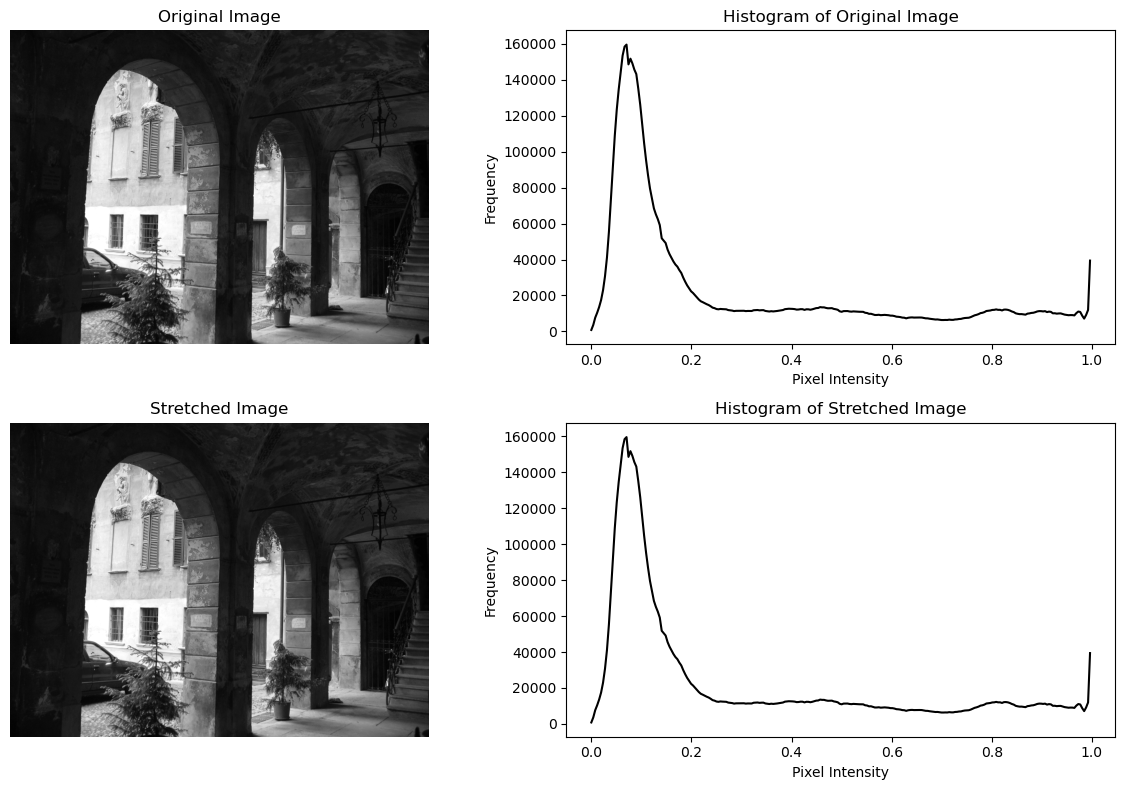

In [ ]:
# solution

def linear_contrast_stretch(image, bins=256):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched_image = (image - min_val) / (max_val - min_val)
    return stretched_image

image = io.imread(image_path)  
gray_image = color.rgb2gray(image)  
stretched_image = linear_contrast_stretch(gray_image)


hist_original, bins_original = np.histogram(gray_image.flatten(), bins=256, range=[0, 1])
hist_stretched, bins_stretched = np.histogram(stretched_image.flatten(), bins=256, range=[0, 1])


fig, axes = plt.subplots(2, 2, figsize=(12, 8))


axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")


axes[0, 1].plot(bins_original[:-1], hist_original, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")


axes[1, 0].imshow(stretched_image, cmap='gray')
axes[1, 0].set_title("Stretched Image")
axes[1, 0].axis("off")


axes[1, 1].plot(bins_stretched[:-1], hist_stretched, color='black')
axes[1, 1].set_title("Histogram of Stretched Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()




# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




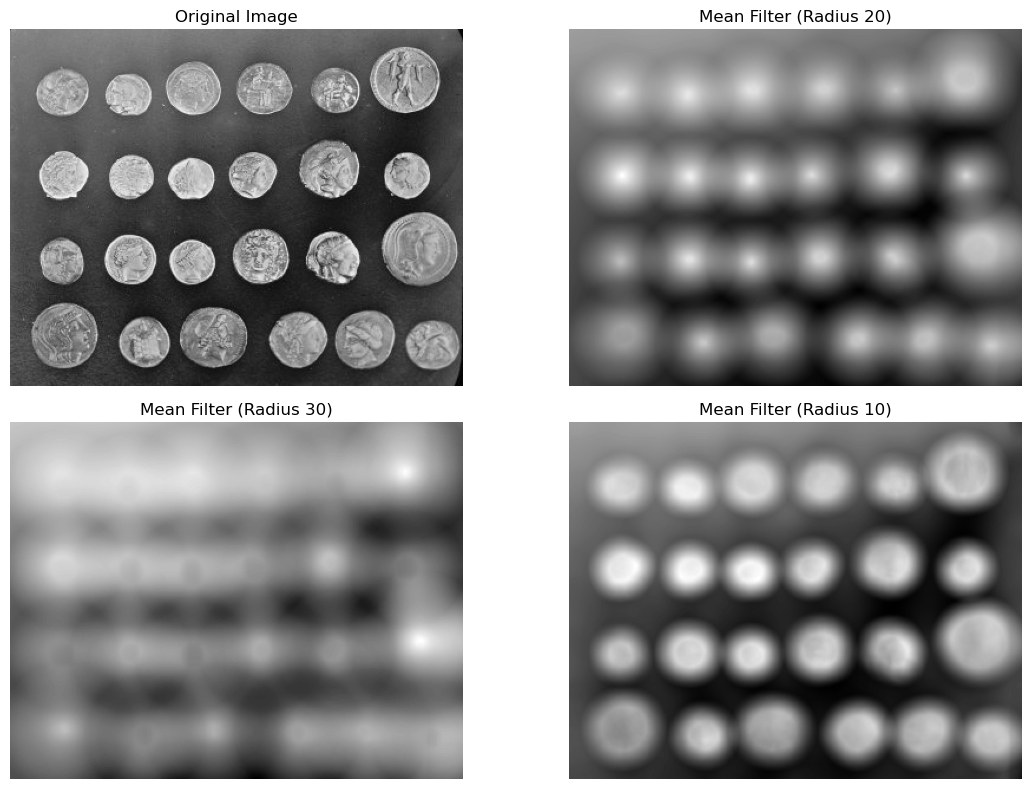

In [29]:
# solution

# Load the coins image
coins = data.coins()

# Convert to 8-bit (rank filters require uint8 input)
coins_ubyte = img_as_ubyte(coins)

# Define structuring elements with different radii
selem_20 = morphology.disk(20)
selem_30 = morphology.disk(30)  # Increased radius
selem_10 = morphology.disk(10)  # Reduced radius

# Apply mean filter using different structuring elements
filtered_20 = rank.mean(coins_ubyte, selem_20)
filtered_30 = rank.mean(coins_ubyte, selem_30)
filtered_10 = rank.mean(coins_ubyte, selem_10)

# Plot results in a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original Image
axes[0, 0].imshow(coins, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Filtered with radius 20
axes[0, 1].imshow(filtered_20, cmap='gray')
axes[0, 1].set_title("Mean Filter (Radius 20)")
axes[0, 1].axis("off")

# Filtered with radius 30
axes[1, 0].imshow(filtered_30, cmap='gray')
axes[1, 0].set_title("Mean Filter (Radius 30)")
axes[1, 0].axis("off")

# Filtered with radius 10
axes[1, 1].imshow(filtered_10, cmap='gray')
axes[1, 1].set_title("Mean Filter (Radius 10)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()



*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

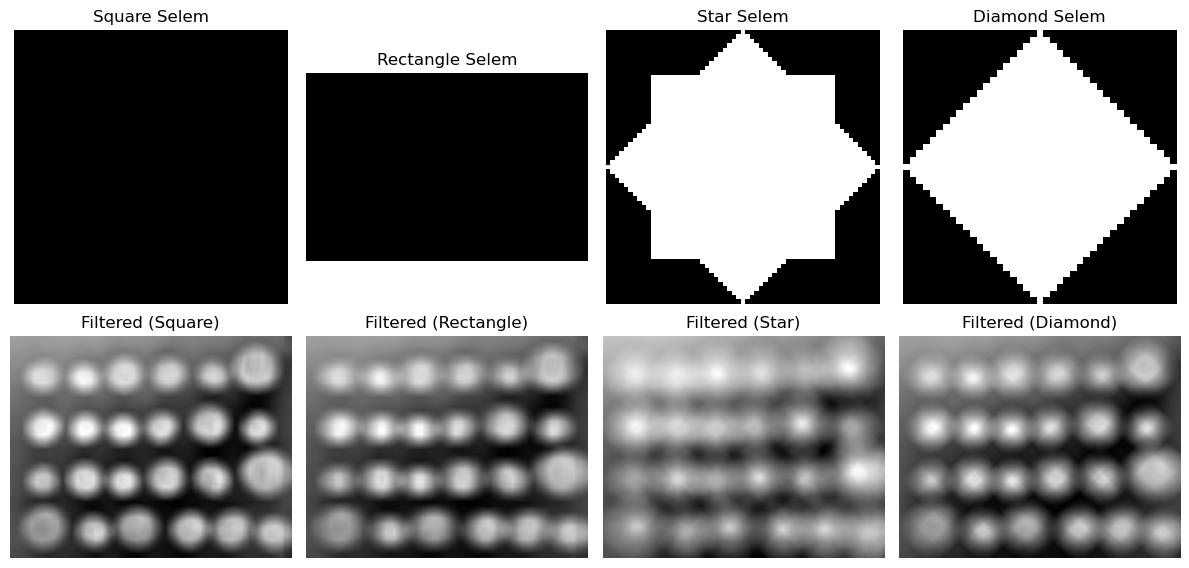

In [30]:
# solution

# Define different structuring elements
selem_square = morphology.square(20)
selem_rectangle = morphology.rectangle(20, 30)
selem_star = morphology.star(20)
selem_diamond = morphology.diamond(20)

# Store structuring elements in a dictionary
selems = {
    "Square": selem_square,
    "Rectangle": selem_rectangle,
    "Star": selem_star,
    "Diamond": selem_diamond
}

# Apply mean filter using each structuring element
filtered_images = {name: rank.mean(coins_ubyte, selem) for name, selem in selems.items()}

# Create a 2xN subplot for visualization
fig, axes = plt.subplots(2, len(selems), figsize=(12, 6))

# Plot structuring elements in the first row
for i, (name, selem) in enumerate(selems.items()):
    axes[0, i].imshow(selem, cmap="gray")
    axes[0, i].set_title(f"{name} Selem")
    axes[0, i].axis("off")

# Plot smoothed images in the second row
for i, (name, filtered_image) in enumerate(filtered_images.items()):
    axes[1, i].imshow(filtered_image, cmap="gray")
    axes[1, i].set_title(f"Filtered ({name})")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()



*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Larger radius → more smoothing, less detail.  
Smaller radius → less smoothing, more detail. 

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Different structuring elements affect smoothing patterns:


* Square & Rectangle → Uniform, strong smoothing.
* Star → Preserves edges but uneven smoothing.
* Diamond → Balanced smoothing, retains some structure. 

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

Difference Between Mean Filter and Gaussian Filter
* Mean Filter: Averages pixel values in a neighborhood, producing uniform smoothing but can cause edge blurring.
* Gaussian Filter: Uses a weighted average where nearby pixels contribute more, resulting in smoother and more natural blurring while preserving edges better.


When to Use Each Filter?
* Use Mean Filter → When removing salt-and-pepper noise or applying fast, simple smoothing.
* Use Gaussian Filter → When reducing Gaussian noise, smoothing while preserving edges, and for preprocessing in computer vision (e.g., edge detection). 

...